# Data Visualization and Analysis
### Human Image and Text Recognition Classification based on Sequential Human Eye-gaze


#### Import libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

## Import and Visualize Training and Test data

In [33]:
colnames = ["fix1", "fix2", "fix3", "fix4", "recog"]

data_train = pd.read_csv("./dataset/fzis_training.csv", header=None, names=colnames)
data_test = pd.read_csv("./dataset/fzis_testing.csv", header=None, names=colnames)

In [34]:
data_train.describe()

,fix1,fix2,fix3,fix4,recog
count,169.000000,169.000000,169.000000,169.000000,169.000000
mean,63.786982,63.893491,60.230769,60.467456,0.881657
std,85.556801,85.096797,85.964278,76.672699,0.323974
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,10.000000,13.000000,11.000000,14.000000,1.000000
50%,35.000000,38.000000,28.000000,32.000000,1.000000
75%,71.000000,79.000000,70.000000,85.000000,1.000000
max,551.000000,660.000000,652.000000,474.000000,1.000000


In [35]:
data_test.describe()

,fix1,fix2,fix3,fix4,recog
count,154.000000,154.000000,154.000000,154.000000,154.000000
mean,58.961039,42.253247,67.155844,57.188312,0.837662
std,77.026257,49.936635,82.157758,70.686158,0.369963
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,13.250000,14.000000,11.000000,1.000000
50%,32.000000,33.000000,36.000000,29.500000,1.000000
75%,58.500000,44.750000,95.000000,67.500000,1.000000
max,527.000000,300.000000,420.000000,305.000000,1.000000


### Data Meaning

Each data-point indicates distances between the first five sequential fixation points of eye-gaze on an image or text document.

There are 4 independent features and 1 dependent feature (target):  

* Feature **fix$n$** is a _numeric_ variable of $\mathbb{R}$.  
    It indicates the distance between $n$-th fixation and $n+1$-th fixation. i.e: **fix2** is the distance between the 2-nd gaze fixation point and the 3-rd fixation point.  
    It can be represented as the following equation
    \begin{align*}
        \text{fix}n = |y_{n} - y_{n+1}| \;,\; n \in \{1,2,3,4\}
    \end{align*}  
    
* Target **recog** is a binary _class_ variable of $\{0,1\}$.  
    It indicates whether the subject recognizes the image or text correctly.


## Plot of Recognition on Fix Distances in Training Set

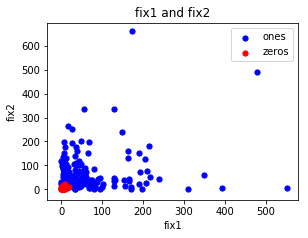

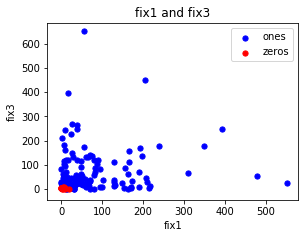

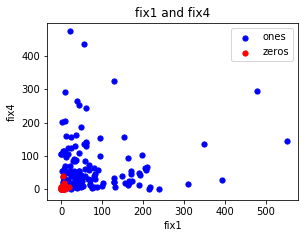

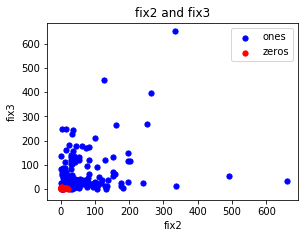

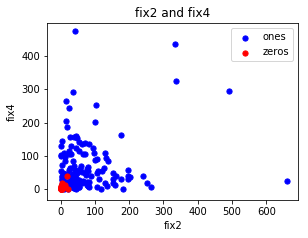

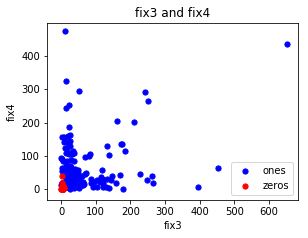

In [57]:
ones = data_train.loc[data_train['recog'] == 1] #dataframe of rows where recog==1 
zeros = data_train.loc[data_train['recog'] == 0] #dataframe of rows where recog==0
msize = 3**3 #scatter plot marker size

for i in range(3):
    for j in range(i, 3):
        x = 'fix' + str(i+1)
        y = 'fix' + str(j+2)

        plt.figure(i, figsize=(4.5,3.25))
        plt.title(x + " and " + y)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.scatter(ones[x], ones[y], c='b', label="ones", s=msize)
        plt.scatter(zeros[x], zeros[y], c='r', label="zeros", s=msize)
        plt.legend()
        plt.show()


### Classification Algorithms and Model

Observing comparison of classification error (CLE) results obtained in Zhu et.al. (2008) on this dataset with Fuzzy Signature (FS) classification and Support Vector Machine with Linear Kernel (SVM) classification model, one can see that:  
* the SVM model produced a lower CLE compared to FS model  

**Hypotheses:**  

1. This low error rate may be equally obtained with an Artificial Neural Network (ANN or NN) model with one hidden layer which can replicate the decision boundary created by the SVM model with Linear kernel.  
    **to do:** implement one-hidden-layer ANN with linear activation function ($\sigma$), calculate CLE, and visualize prediction (and decision boundary, if possible?).  

With one of the target classes being concentrated in the region with small fixation distance values (i.e **fix$n$**),  

2. a NN with more than 1 hidden layer may be able to capture the data with a higher accuracy compared to the Linear-kernel SVM, because multiple hidden layers of the NN can "construct" multiple linear decision boundaries, which can "contain" (in a visual sense) the class better.  
    **to do:** implement two-hidden-layer ANN with linear $\sigma$, calculate CLE, visualize prediction (and decision boundary)

3. a single hidden-layer NN with a non-linear activation function may also be able to achieve at least the CLE of the Linear-kernel SVM, as the non-linearity can "contain" (in a visual sense)  
    **to do:** implement (1) one-hidden-layer NN with Sigmoid $\sigma$ and (2) two-hidden-layer NN with Sigmoid $\sigma$, then calculate CLE, visualize prediction (and decision boundary) for both models.

**Research task for each Hypothesis:**
1. Look for research papers that support each hypothesis (i.e about number of layers and activation function)
2. Look for references to help decide the number of neurons in the hidden layers.


### Bibliography

1. Zhu, D., Mendis, B. S. U., Gedeon, T., Asthana, A., & Goecke, R. (2008, November). A hybrid fuzzy approach for human eye gaze pattern recognition. In International Conference on Neural Information Processing (pp. 655-662). Springer, Berlin, Heidelberg.